<div style="background-color:#f0f8ff; padding:10px; border-radius:10px;">
  <h1 style="text-align:center; color:#1a5276;">
    📈 META Analysis
  </h1>
</div>

In [1]:
#auto loading
%load_ext autoreload
%autoreload 2

## 🧱 1. Setup & Imports

In [2]:
import warnings
import pandas as pd
from utils.ticker_analyzer import TickerAnalyzer
from eda.data_quality_utils import DataQualityUtils
from data.load_data import load_local_data

In [3]:
warnings.filterwarnings("ignore")

In [4]:
# variable
TICKER= 'META'

In [5]:
#paths
RAW_DATA_PATH='../../data/raw/yfinance_data/'+TICKER+'_historical_data.csv'
CLEANED_DATA_PATH='../../data/interim/'+TICKER+'_historical_cleaned_data.csv'

### 📌 Project Overview

#### AAPL Ticker Analysis 📊

**Objective:**  
This notebook applies the `TickerAnalyzer` class to analyze Apple Inc. (AAPL) stock performance. The analysis integrates:

- Historical price data via `yfinance`
- Technical indicators using `ta`
- News sentiment analysis with `VADER`
- Visualization of price movements vs. sentiment trends

**Period:** Last 6 months (daily intervals)  
**Tools:** Python, `yfinance`, `ta`, `vaderSentiment`, `matplotlib`

---


## 📦 2. Data Loading & Overview  <a id= '2-data-loading--overview'></a>

In [6]:
# Load the stock news sentiment data
df = load_local_data(RAW_DATA_PATH,)
df.head()

INFO:data.load_data:Loading data from: /home/teshager/Documents/10Academy/repositories/projects/financial-news-sentiment-analysis/data/raw/yfinance_data/META_historical_data.csv (type=csv)
INFO:data.load_data:Data loaded successfully. Shape: (2926, 9)


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2012-12-12,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0
1,2012-12-13,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0
2,2012-12-14,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0
3,2012-12-17,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0
4,2012-12-18,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0


### Dataset Overview

In [7]:
#view sample data
df.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
199,2013-09-27,50.290001,51.279999,49.860001,51.240002,51.134922,81410500,0.0,0.0
537,2015-02-02,76.110001,76.139999,73.750000,74.989998,74.836220,41955300,0.0,0.0
1805,2020-02-14,214.000000,214.929993,212.649994,214.179993,213.740768,10741700,0.0,0.0
222,2013-10-30,50.000000,50.209999,48.750000,49.009998,48.909492,127073000,0.0,0.0
2265,2021-12-10,332.559998,335.029999,326.369995,329.750000,329.073761,14528000,0.0,0.0
1440,2018-08-31,177.149994,177.619995,174.979996,175.729996,175.369629,18065200,0.0,0.0
2886,2024-06-03,470.859985,479.600006,468.239990,477.489990,477.016388,11279400,0.0,0.0
1294,2018-02-02,192.039993,194.210007,189.979996,190.279999,189.889786,26677500,0.0,0.0
2290,2022-01-18,323.290009,324.209991,317.640015,318.149994,317.497559,22645600,0.0,0.0
2334,2022-03-22,211.369995,219.460007,210.179993,216.649994,216.205704,31998800,0.0,0.0


In [8]:
#see the last rows
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
2921,2024-07-24,472.309998,476.299988,460.579987,461.269989,461.269989,17649700,0.0,0.0
2922,2024-07-25,463.260010,463.549988,442.649994,453.410004,453.410004,18240500,0.0,0.0
2923,2024-07-26,464.200012,469.769989,459.420013,465.700012,465.700012,14222400,0.0,0.0
2924,2024-07-29,469.880005,473.959991,465.019989,465.709991,465.709991,11339600,0.0,0.0
2925,2024-07-30,467.000000,472.730011,456.700012,463.190002,463.190002,11390400,0.0,0.0


In [9]:
#shape of the dataset
df.shape

(2926, 9)

In [10]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

## 📐 3. Data Types & Basic Stats <a id='3-data-types--basic-stats'></a>

In [11]:
#Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2926.0,1.795572e+02,1.088649e+02,2.299000e+01,9.776750e+01,1.668700e+02,2.314500e+02,5.423500e+02
High,2926.0,1.818753e+02,1.102562e+02,2.309000e+01,9.877250e+01,1.688500e+02,2.349350e+02,5.428100e+02
Low,2926.0,1.773178e+02,1.075111e+02,2.267000e+01,9.589000e+01,1.642100e+02,2.286875e+02,5.283600e+02
Close,2926.0,1.796495e+02,1.089070e+02,2.290000e+01,9.738250e+01,1.668550e+02,2.324250e+02,5.399100e+02
Adj Close,2926.0,1.793059e+02,1.087551e+02,2.285304e+01,9.718279e+01,1.665128e+02,2.319484e+02,5.399100e+02
Volume,2926.0,2.872083e+07,2.269811e+07,5.467500e+06,1.571308e+07,2.176100e+07,3.294468e+07,3.654579e+08
Dividends,2926.0,3.417635e-04,1.306994e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e-01
Stock Splits,2926.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [12]:
#for columns of object type
df.describe(include=['O']).T

,count,unique,top,freq
Date,2926,2926,2012-12-12,1


In [13]:
# data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2926 entries, 0 to 2925
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2926 non-null   object 
 1   Open          2926 non-null   float64
 2   High          2926 non-null   float64
 3   Low           2926 non-null   float64
 4   Close         2926 non-null   float64
 5   Adj Close     2926 non-null   float64
 6   Volume        2926 non-null   int64  
 7   Dividends     2926 non-null   float64
 8   Stock Splits  2926 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 205.9+ KB


In [14]:
#distinct values in each column
df.nunique().sort_values(ascending=False)

Date            2926
Volume          2918
Adj Close       2778
Close           2777
Low             2749
High            2748
Open            2738
Dividends          2
Stock Splits       1
dtype: int64

## 🔍 4. Data Quality Analysis <a id='4-data-quality-analysis'></a>

In [15]:
#instantiate the DataQualityUtils class
dq=DataQualityUtils(df)

In [16]:
#count of missing values per column
dq.summary()

,#missing_values,percentage
Date,0,0.00%
Open,0,0.00%
High,0,0.00%
Low,0,0.00%
Close,0,0.00%
Adj Close,0,0.00%
Volume,0,0.00%
Dividends,0,0.00%
Stock Splits,0,0.00%


### Missing Values

In [17]:
#column with >5% nulls
dq.columns_with_significant_missing_values(threshold=5)

,#missing_values,percentage


### Duplicates

In [18]:
#count duplicates
dq.count_duplicates()

0

### Invalid Values

In [19]:
dq.find_invalid_values()

{}

## 🧹 5. Data Cleaning  <a id='5-data-cleaning'></a>

In [20]:
#saving the original dataset for later use
df_original=df.copy()

### Inconsistencies and Inaccuracies

In [21]:
#drop redundancies and clean column names
df=dq.drop_redundant_columns()

In [22]:
df=dq.convert_columns_to_datetime()

[Date] Converted: 2926/2926 (0 became NaT)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2926 entries, 0 to 2925
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          2926 non-null   datetime64[ns, UTC]
 1   Open          2926 non-null   float64            
 2   High          2926 non-null   float64            
 3   Low           2926 non-null   float64            
 4   Close         2926 non-null   float64            
 5   Adj Close     2926 non-null   float64            
 6   Volume        2926 non-null   int64              
 7   Dividends     2926 non-null   float64            
 8   Stock Splits  2926 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(7), int64(1)
memory usage: 205.9 KB


In [24]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

In [25]:
df.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
2144,2021-06-21 00:00:00+00:00,331.089996,332.920013,327.649994,332.290009,331.608582,11337500,0.0,0.0
2063,2021-02-24 00:00:00+00:00,262.329987,266.380005,258.390015,264.309998,263.767944,15736100,0.0,0.0
2016,2020-12-15 00:00:00+00:00,274.829987,276.079987,267.470001,275.549988,274.984924,23979500,0.0,0.0
602,2015-05-06 00:00:00+00:00,77.970001,78.809998,77.050003,78.099998,77.939835,28663000,0.0,0.0
1240,2017-11-14 00:00:00+00:00,178.130005,178.970001,177.179993,178.070007,177.704834,9585900,0.0,0.0
651,2015-07-16 00:00:00+00:00,90.279999,90.860001,89.769997,90.849998,90.663689,21804100,0.0,0.0
1183,2017-08-24 00:00:00+00:00,168.880005,169.289993,166.410004,167.740005,167.396011,14030400,0.0,0.0
1603,2019-04-29 00:00:00+00:00,190.949997,195.410004,190.649994,194.779999,194.380569,19641300,0.0,0.0
2209,2021-09-22 00:00:00+00:00,347.230011,349.839996,340.690002,343.209991,342.506165,43692900,0.0,0.0
2510,2022-12-01 00:00:00+00:00,119.199997,121.199997,118.400002,120.440002,120.193016,36551400,0.0,0.0


In [26]:
# Save to csv
df.to_csv(CLEANED_DATA_PATH, index=False)

## 6. Analyze

In [27]:
# Load the ticker analyze
ta = TickerAnalyzer("AAPL")
ta.load_price_data_from_csv(CLEANED_DATA_PATH)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2012-12-12 00:00:00+00:00,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0
1,2012-12-13 00:00:00+00:00,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0
2,2012-12-14 00:00:00+00:00,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0
3,2012-12-17 00:00:00+00:00,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0
4,2012-12-18 00:00:00+00:00,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2921,2024-07-24 00:00:00+00:00,472.309998,476.299988,460.579987,461.269989,461.269989,17649700,0.0,0.0
2922,2024-07-25 00:00:00+00:00,463.260010,463.549988,442.649994,453.410004,453.410004,18240500,0.0,0.0
2923,2024-07-26 00:00:00+00:00,464.200012,469.769989,459.420013,465.700012,465.700012,14222400,0.0,0.0
2924,2024-07-29 00:00:00+00:00,469.880005,473.959991,465.019989,465.709991,465.709991,11339600,0.0,0.0


In [28]:
# Instantiate the analyzer for a specific ticker (ticker is mostly for metadata here)
analyzer = TickerAnalyzer(ticker="AAPL", period="1y", interval="1d")

In [29]:
# Load Price Data from CSV
price_df = analyzer.load_price_data_from_csv(CLEANED_DATA_PATH)

print("Price Data Sample:")
print(price_df.head())

Price Data Sample:
                       Date       Open       High        Low      Close  \
0 2012-12-12 00:00:00+00:00  28.000000  28.139999  27.370001  27.580000   
1 2012-12-13 00:00:00+00:00  27.590000  28.750000  27.430000  28.240000   
2 2012-12-14 00:00:00+00:00  28.180000  28.330000  26.760000  26.809999   
3 2012-12-17 00:00:00+00:00  26.770000  27.000000  26.320000  26.750000   
4 2012-12-18 00:00:00+00:00  26.959999  27.910000  26.900000  27.709999   

   Adj Close    Volume  Dividends  Stock Splits  
0  27.523441  46704200        0.0           0.0  
1  28.182087  81051600        0.0           0.0  
2  26.755020  91631600        0.0           0.0  
3  26.695143  57742500        0.0           0.0  
4  27.653173  60512900        0.0           0.0  


In [30]:
# Add Technical Indicators ===
analyzer.price_df.rename(
    columns={
        'date': 'Date',
        'open': 'Open',
        'high': 'High',
        'low': 'Low',
        'close': 'Close',
        'volume': 'Volume'
    }, inplace=True)
price_with_indicators = analyzer.add_technical_indicators()
print("\nPrice Data with Technical Indicators Sample:")
print(price_with_indicators[['Date', 'Close','momentum_rsi', 'Volume','trend_macd']].head())


Price Data with Technical Indicators Sample:
                       Date      Close  momentum_rsi    Volume  trend_macd
0 2012-12-12 00:00:00+00:00  27.580000           NaN  46704200         NaN
1 2012-12-13 00:00:00+00:00  28.240000           NaN  81051600         NaN
2 2012-12-14 00:00:00+00:00  26.809999           NaN  91631600         NaN
3 2012-12-17 00:00:00+00:00  26.750000           NaN  57742500         NaN
4 2012-12-18 00:00:00+00:00  27.709999           NaN  60512900         NaN


{'Cumulative Return': 15.401912400690726, 'Annualized Volatility': 0.385387407083589, 'Sharpe Ratio': 0.7717542450046889, 'Max Drawdown': -0.7673609153644646, 'Calmar Ratio': 20.071275578813466}


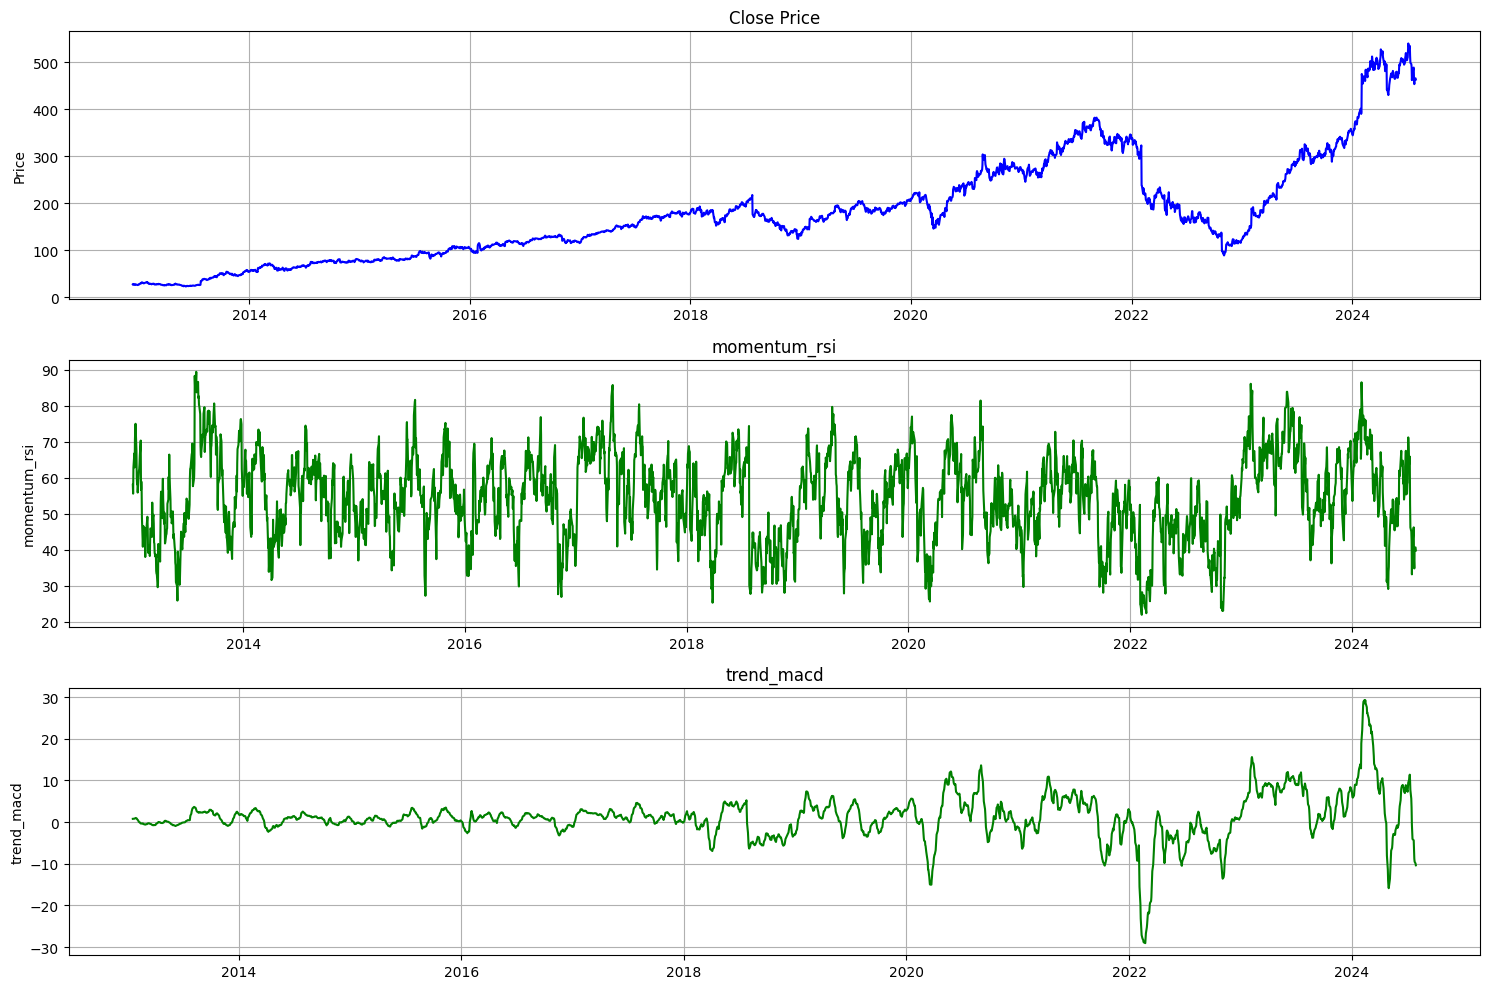

In [31]:
metrics = analyzer.compute_financial_metrics()
print(metrics)
analyzer.plot_price_and_indicators()